In [15]:
import torch
from torch import nn # nn contains all PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## Data Preparation

Data can be anything :
* CSV
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio
* DNA
* Text

Machine learning is a game of two parts :

    1. Data to numeric
    2. Build a model to learn pattern of that data

##### Creating data(straingt line) using linear regression formula

`y = a + bX` (a is bias , b is weight)

In [436]:
# Creating *know* parameter
weight = 0.7
bias = 0.3

# Create

start = 0
stop = 1
step = 0.02
X = torch.arange(start, stop, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [437]:
# Splitting data into training and test set

train_split = int(80 * len(X) / 100)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

#### Visualizing

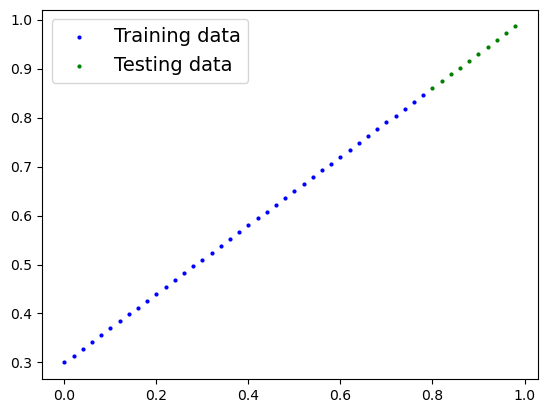

In [438]:
def plot_predictions(y_preds = None):
    plt.scatter(X_train, y_train, c = 'blue', s = 4, label = "Training data")
    plt.scatter(X_test, y_test, c = 'green', s = 4, label = "Testing data")
        
    if y_preds is not None:
        plt.scatter(X_test, y_preds, c = 'red', s = 4, label = "Predictions")
    
    plt.legend(prop = {"size" : 14})
    plt.show()
    
plot_predictions()

### Building a model

* Logistic regression

In [474]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                              requires_grad = True,
                                              dtype = torch.float32))

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float32))
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weight * x + self.bias # this is the linear regression formula

### Pytorch model building essentials

* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclass require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Checking parameters of what's inside our model using `.parameters()`

In [475]:
# setting up random seed
torch.manual_seed(42)

# Creating an object/ instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checking parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [476]:
# list models parameters.
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [477]:
# Making prediction using `torch.inference_mode()`
# when data is passeed through our model, it's going to run through the forward() methon

with torch.inference_mode():  # use this everytime to have clean predictions and also, in large datasets, predictions are faster.
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

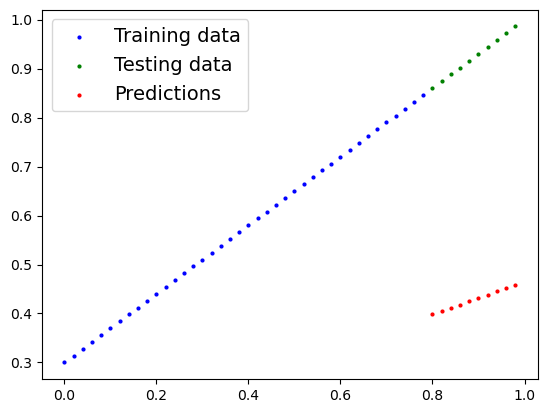

In [478]:
plot_predictions(y_preds)

In [479]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.001) # Learning rate is the most import hyperparameter. It changes the bias and weights(predictions) value to match the y_test value

### Building a training loop (and a testing loop) in PyTorch

* Loop through the data
* Forward pass (this involves data moving through out model's `forward()` function to make predictions (also called forward propagation)
* Calculate the loss (compare forward pass predictions to ground truth labels)
* Optimizer zero grad
* Loss backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**back propagation**)
* Optimizer step - use optimizer to adjust our model's parameters to try and improve the loss (**gradient(slope) descent**)

In [480]:
torch.manual_seed(42)


# Epoch is the loop through the data
epochs = 1000    # hyperparameter because we set it up ourself


### Training loop
# Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    
    # Forward pass
    y_pred = model_0(X_train)
    
    
    # Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss : {loss}")
    
    
    #  Zero the gradients of the optimizer (they accumulate by default)
    optimizer.zero_grad()
    
    
    # Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    
    # Step the optimizer (perform gradient descent)
    optimizer.step() # by default, optimizer saves the previous value which needs to be reset every the loop runs.
    
    
    print(model_0.state_dict())


    model_0.eval() # turns off gradient tracking


Loss : 0.31288138031959534
OrderedDict([('weight', tensor([0.3371])), ('bias', tensor([0.1298]))])
Loss : 0.3117292523384094
OrderedDict([('weight', tensor([0.3375])), ('bias', tensor([0.1308]))])
Loss : 0.3105771541595459
OrderedDict([('weight', tensor([0.3379])), ('bias', tensor([0.1318]))])
Loss : 0.3094250559806824
OrderedDict([('weight', tensor([0.3383])), ('bias', tensor([0.1328]))])
Loss : 0.30827295780181885
OrderedDict([('weight', tensor([0.3386])), ('bias', tensor([0.1338]))])
Loss : 0.3071208596229553
OrderedDict([('weight', tensor([0.3390])), ('bias', tensor([0.1348]))])
Loss : 0.3059687614440918
OrderedDict([('weight', tensor([0.3394])), ('bias', tensor([0.1358]))])
Loss : 0.3048166334629059
OrderedDict([('weight', tensor([0.3398])), ('bias', tensor([0.1368]))])
Loss : 0.30366456508636475
OrderedDict([('weight', tensor([0.3402])), ('bias', tensor([0.1378]))])
Loss : 0.3025124669075012
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss : 0.30136033

OrderedDict([('weight', tensor([0.4592])), ('bias', tensor([0.3806]))])
Loss : 0.04907313734292984
OrderedDict([('weight', tensor([0.4594])), ('bias', tensor([0.3808]))])
Loss : 0.04898611828684807
OrderedDict([('weight', tensor([0.4597])), ('bias', tensor([0.3809]))])
Loss : 0.048899102956056595
OrderedDict([('weight', tensor([0.4600])), ('bias', tensor([0.3811]))])
Loss : 0.04881208389997482
OrderedDict([('weight', tensor([0.4602])), ('bias', tensor([0.3812]))])
Loss : 0.04872506856918335
OrderedDict([('weight', tensor([0.4605])), ('bias', tensor([0.3814]))])
Loss : 0.048638053238391876
OrderedDict([('weight', tensor([0.4607])), ('bias', tensor([0.3815]))])
Loss : 0.04855869710445404
OrderedDict([('weight', tensor([0.4610])), ('bias', tensor([0.3816]))])
Loss : 0.048492539674043655
OrderedDict([('weight', tensor([0.4612])), ('bias', tensor([0.3817]))])
Loss : 0.04842637851834297
OrderedDict([('weight', tensor([0.4614])), ('bias', tensor([0.3818]))])
Loss : 0.04836020991206169
Ordered

OrderedDict([('weight', tensor([0.5262])), ('bias', tensor([0.3730]))])
Loss : 0.0349377766251564
OrderedDict([('weight', tensor([0.5263])), ('bias', tensor([0.3729]))])
Loss : 0.03490393981337547
OrderedDict([('weight', tensor([0.5265])), ('bias', tensor([0.3729]))])
Loss : 0.03486904129385948
OrderedDict([('weight', tensor([0.5267])), ('bias', tensor([0.3728]))])
Loss : 0.03483524173498154
OrderedDict([('weight', tensor([0.5269])), ('bias', tensor([0.3727]))])
Loss : 0.03480052202939987
OrderedDict([('weight', tensor([0.5270])), ('bias', tensor([0.3727]))])
Loss : 0.034766342490911484
OrderedDict([('weight', tensor([0.5272])), ('bias', tensor([0.3726]))])
Loss : 0.034731991589069366
OrderedDict([('weight', tensor([0.5274])), ('bias', tensor([0.3725]))])
Loss : 0.034697435796260834
OrderedDict([('weight', tensor([0.5275])), ('bias', tensor([0.3724]))])
Loss : 0.03466346859931946
OrderedDict([('weight', tensor([0.5277])), ('bias', tensor([0.3724]))])
Loss : 0.03462856262922287
OrderedD

In [481]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [482]:
# model_0.state_dict()

In [488]:
# we need our model to weight and bias and match to these results
# According to those weights and bias, predicted tensors accuracy is determined
weight, bias

(0.7, 0.3)

In [484]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

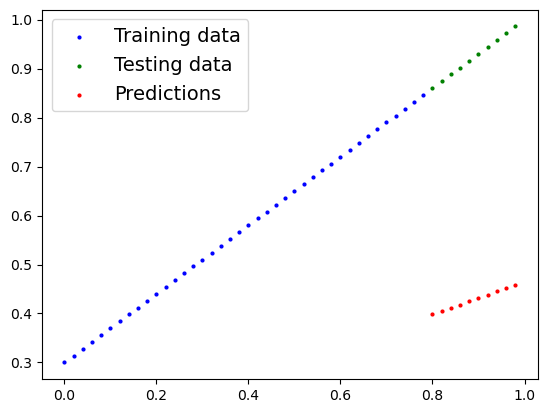

In [485]:
plot_predictions(y_preds)

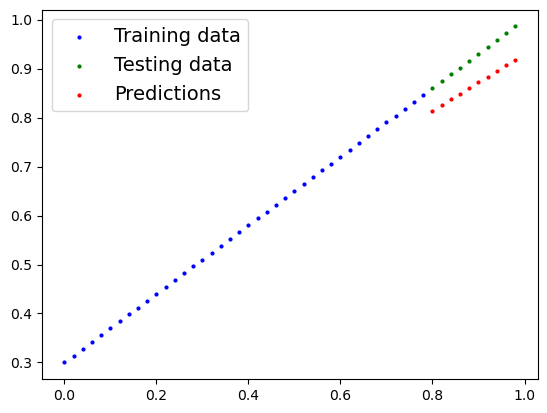

In [486]:
plot_predictions(y_preds_new)

### Inorder to have more accurate result, Learning rate and epochs can be changed.